# Basics of the random number generators in Libra

## Table of Content <a name="TOC"></a>

1. [General setups](#setups)

2. [Available distributions](#distributions) 

  2.1. [Uniform distribution](#uniform-1) 
  
  2.2. [Normal distribution](#normal-1)   
  
  2.3. [Exponential distribution](#exponential-1) 
  
  2.4. [Poisson distribution](#gamma-1) 
  
  2.5. [Gamma distribution](#gamma-1) 
  
  2.6. [Arbitrary distributions](#arbitrary) 

3. [Generating quasi-random numbers](#quasi-random)


### A. Learning objectives

- to distinguish the probability density function (PDF) and cumulative distribution function (CDF)
- to sample random numbers from uniform, normal, exponential, Poisson, and gamma distributions
- to know how to probability density function transforms with the transformation of random numbers
- to compute probability density of the provided data
- to be able to produce series of quasi-random numbers

### B. Use cases

- Sampling from common distributions
- Sampling from arbitrary distributions
- Computing data probability densities
- Generating quasi-random numbers
- Dynamical regimes and chaotic systems

### C. Functions

None
  
### D. Classes and class members

- `liblibra::libdata`
  - [`DATA`](#DATA-1)
    - [`Calculate_Distribution`](#Calculate_Distribution-1)
    
- `liblibra::librandom`
  - [`Random`](#Random-1)
    - [`uniform`](#uniform-1)
    - [`p_uniform`](#p_uniform-1)
    - [`normal`](#normal-1)
    - [`p_normal`](#p_normal-1)
    - [`exponential`](#exponential-1)
    - [`exponential`](#p_exponential-1)
    - [`poiss1`](#poiss1-1)
    - [`poiss2`](#poiss2-1)
    - [`p_poiss`](#p_poiss-1)
    - [`gamma`](#gamma-1)
    - [`p_gamma`](#p_gamma-1)


## 1. General setups
<a name="setups"></a> [Back to TOC](#TOC)

In [1]:
import math
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/import

## 2. Available distributions 
<a name="distributions"></a>[Back to TOC](#TOC)

Sampling of random numbers from several popular distributions is available in Libra via the `Random` class.

One usually needs to create an object of this data type (and only once) and pass it to other functions that need random numbers sampling. As the "random" numbers generated by the computer are in reality the quasi-random numbers, they are determined by the initial seed. Usually, the seed is determined by the local time. 

Creating an object of the `Random` class re-initializes the seed to be almost the same every time (if this is done very quickly as in the example below), negatively caffecting the quality of the sampling.

Instead, if one initializes the object only once and just keeps calling the method that yields a "random" number from the desired distributions, one does produce a reasonale sample of the random numbers. 

Compare:
<a name="Random-1"></a>

In [7]:
for i in range(10):
    r = Random()
    print( i, r.uniform(0.0, 1.0) )

r = Random()
for i in range(10):
    print(i, r.uniform(0.0, 1.0))


0 0.11754857381691625
1 0.11754857381691625
2 0.11754857381691625
3 0.11754857381691625
4 0.11754857381691625
5 0.11754857381691625
6 0.11754857381691625
7 0.11754857381691625
8 0.11754857381691625
9 0.11754857381691625
0 0.11754857381691625
1 0.6703211319028964
2 0.5478870433512549
3 0.5496174961093895
4 0.13296560902752244
5 0.9012184692086738
6 0.8384199770346377
7 0.5345477161624226
8 0.1979754474935939
9 0.18773376112232626


### 2.1. Uniform distibution
<a name="uniform-1"></a>[Back to TOC](#TOC)

Random numberes sampled uniformly on an interval $[a, b]$ are returned by the `rnd.uniform(a, b)` function. That is the probability density function (PDF) for it is:
$$ PDF(x) = \frac{1}{b-a}, \forall x \in [a, b]$$

The cumulative distribution function (CDF) is just an integral of the PDF:
$$ CDF(x) = \int_a^x { PDF(x') dx'}, \forall x \in [a, b]$$

<a name="p_uniform-1"></a><a name="DATA-1"></a><a name="Calculate_Distribution-1"></a>
The PDF is returned by `rnd.p_unifom` function

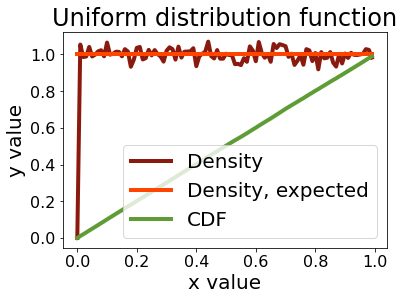

In [8]:
rnd = Random()

def map_f(x):
    return rnd.p_uniform(0.0, 1.0)


x, y = [], []
for i in range(100):
    x.append(0.01*i)

for i in range(100000):
    y.append(rnd.uniform(0.0, 1.0))    
    
Y = DATA(y)
dens_y, cum_y = Y.Calculate_Distribution(x)

z = list(map( map_f , np.array(x) ))

plt.title('Uniform distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

### 2.2. Normal distibution
<a name="normal-1"></a>[Back to TOC](#TOC)

The `X = rnd.normal()` function samples random numbers from the standard normal distribution, that is the one with zero mean $\mu = 0$ and unit variance $\sigma^2 = 1$

The probability density function $$\phi(x) = \frac{1}{2\pi} exp(-x^2/2)$$ is returned by the `rnd.p_normal` function.

Then the variable $\mu + \sigma * X$ will be distributed according to the general normal distribution with the 
probability density function given by $$f(x | \mu, \sigma^2) = \frac{1}{\sigma} \phi( \frac{x - \mu}{\sigma})$$ 

See also [here](https://en.wikipedia.org/wiki/Normal_distribution)
<a name="p_normal-1"></a>

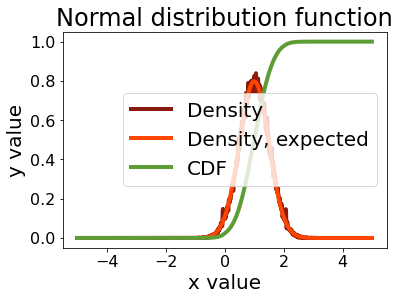

In [9]:
def map_f(x):    
    sigma = 0.5  # 
    
    return rnd.p_normal( (x - 1) / sigma ) / sigma

x, y = [], []
for i in range(-500, 500):
    x.append(0.01*i)

for i in range(100000):
    y.append(1.0 + 0.5*rnd.normal())    
    
Y = DATA(y)

dens_y, cum_y = Y.Calculate_Distribution(x)

z = list(map( map_f , np.array(x) ))

plt.title('Normal distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

### 2.3. Exponential distibution
<a name="exponential-1"></a>[Back to TOC](#TOC)

The exponentially-distributed random number are returned by the function `rnd.exponential`.

The PDF is:  $$PDF(x | \lambda) = \lambda exp( - \lambda x),  \forall x >= 0 $$

<a name="p_exponential-1"></a>

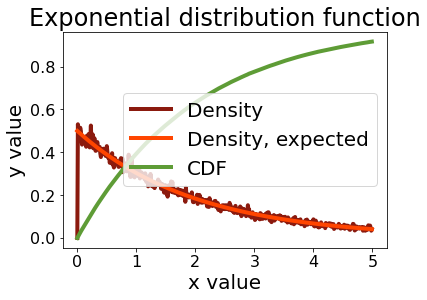

In [10]:
lamb = 0.5

def map_f(x):        
    return rnd.p_exponential( x, lamb )

x, y = [], []
for i in range(0, 500):
    x.append(0.01*i)

for i in range(100000):
    y.append(rnd.exponential(lamb))    
    
Y = DATA(y)

dens_y, cum_y = Y.Calculate_Distribution(x)

z = list(map( map_f , np.array(x) ))

plt.title('Exponential distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

### 2.4. Poisson distibution
<a name="poisson-1"></a>[Back to TOC](#TOC)

There are two functions to sample random numbers from the Poisson distribution:

<a name="poiss1-1"></a>
* `rnd.poiss1` - implements Knuth's algorithm
<a name="poiss2-1"></a>
* `rnd.poiss1` - implements Ahrens-Dieter algorithm

The CDF is given by:

$$ CDF(k | \lambda) = exp(-k) \sum_{i=0}^{|k|} \frac{ \lambda^i}{i!} $$

<a name="p_poiss-1"></a>
and is returned by the `rnd.p_poiss` function.

> <a style="color:red">WARNING</a> Doesn't work too well for small $\lambda$ values (e.g. $\lambda <= 1$)

Poisson distribution samples only integer numbers, not continuous ones - that's the reason the "experimental" probability density is computed only at certain points (integer values of x).

Read more [here](https://en.wikipedia.org/wiki/Poisson_distribution)

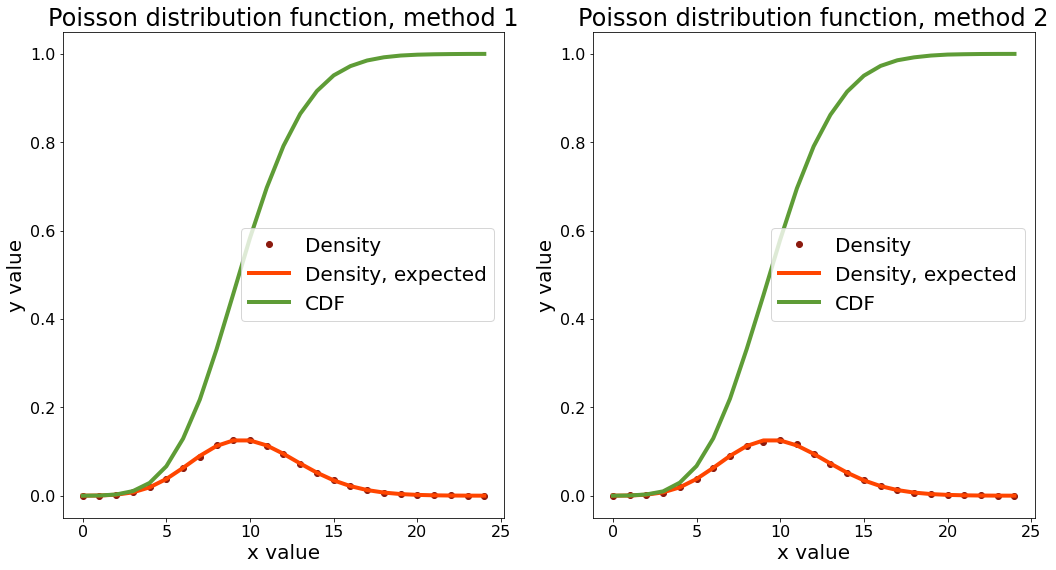

In [11]:
lamb = 10.0

def map_f(x):        
    return rnd.p_poiss( int(x), lamb )

x, y1, y2 = [], [], []
for i in range(0, 25):
    x.append(i)

for i in range(100000):
    y1.append(rnd.poiss1(lamb))    
    y2.append(rnd.poiss1(lamb))    
    
Y1 = DATA(y1)
Y2 = DATA(y2)

dens_y1, cum_y1 = Y1.Calculate_Distribution(x)
dens_y2, cum_y2 = Y2.Calculate_Distribution(x)

z = list(map( map_f , np.array(x) ))

plt.figure(1, figsize=(18, 9))

plt.subplot(1,2, 1)
plt.title('Poisson distribution function, method 1')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y1, "bo", label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y1, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()

plt.subplot(1,2, 2)
plt.title('Poisson distribution function, method 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y2, "bo", label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y2, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()

plt.show()
plt.close()

### 2.5. Gamma distibution
<a name="gamma-1"></a>[Back to TOC](#TOC)

* `rnd.gamma` - implements Ahrens-Dieter algorithm

The PDF is returned by the `rnd.p_gamma` function.

<a style="color:red">WARNING</a> Doesn't work too well for small $\lambda$ values (e.g. $\lambda <= 2.0$)
<a name="p_gamma-1"></a>

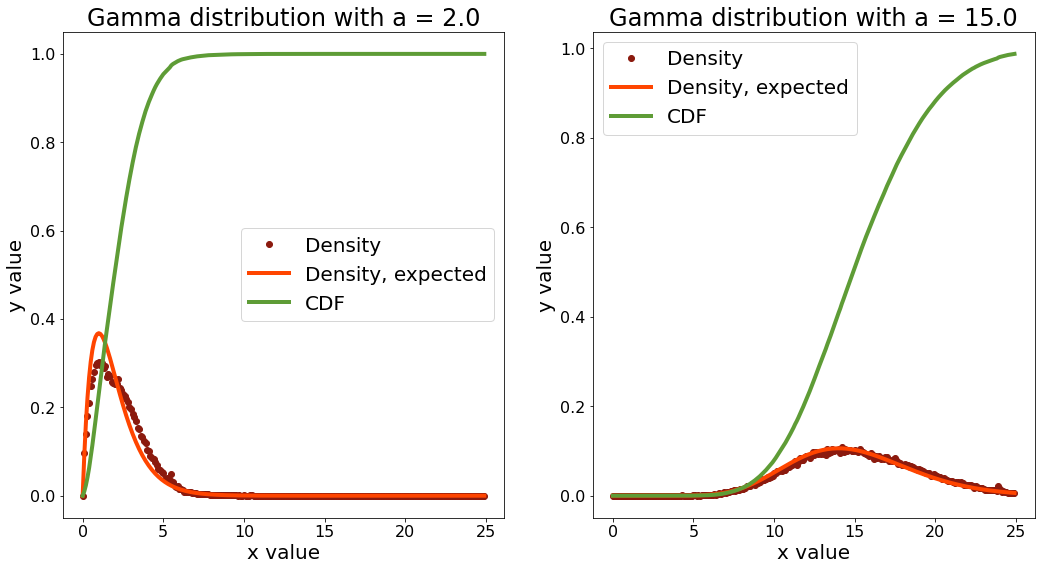

In [12]:
a1 = 2.0
a2 = 15.0

def map_f1(x):        
    return rnd.p_gamma( a1, x )
def map_f2(x):        
    return rnd.p_gamma( a2, x )


x, y1, y2 = [], [], []
for i in range(0, 250):
    x.append(0.1*i)

for i in range(100000):
    y1.append(rnd.gamma(a1))    
    y2.append(rnd.gamma(a2))    
    
Y1 = DATA(y1)
Y2 = DATA(y2)

dens_y1, cum_y1 = Y1.Calculate_Distribution(x)
dens_y2, cum_y2 = Y2.Calculate_Distribution(x)

z1 = list(map( map_f1 , np.array(x) ))
z2 = list(map( map_f2 , np.array(x) ))

plt.figure(1, figsize=(18, 9))

plt.subplot(1,2, 1)
plt.title(F'Gamma distribution with a = {a1}')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y1, "bo", label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z1, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y1, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()

plt.subplot(1,2, 2)
plt.title(F'Gamma distribution with a = {a2}')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y2, "bo", label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z2, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y2, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()

plt.show()
plt.close()

### 2.6. Arbitrary distibutions
<a name="arbitrary"></a>[Back to TOC](#TOC)

We can use the inversion procedure known in statistics, to generate random numbers having more complex PDFs.

Specifically, if $\xi$ has the CDF: $F(x)$, that is if $$\xi \in F_{\xi}(x) $$ then

$$ \eta \in F_{\eta}^{-1}(\xi) $$ would be uniformly distributed

Indeed:

$$ \eta \in F_{\eta}^{-1}(\xi) = \eta \in F_{\eta}^{-1}( F_{\xi}(x) ) = x $$, which corresponds to the uniform distribution.



**Example 1:**

This is how the exponential distribution sampling is implemented: 
If 

$$P_{\xi} = x$$ and 
$$ \eta = -\frac{1}{a} ln(1-\xi) $$
then
$$P_{\eta} = 1 - exp( - a x) $$


**Example 2:**

If we sample $\xi$ from the uniform distribution on interval $[0, 1]$:

$$P_\xi(x) = x$$ 

and: 
$$ \eta = \sqrt \xi $$

then:

$$P_{\eta} = x^2 $$ (including the normalization)

Then, the PDF of this distribution is: $$PDF = dP_{\eta} = 2 x $$ 





For the a $[0.0, 1.0]$ interval, the expected normalized PDF would be:
$$ PDF(x) = 3 x^2$$


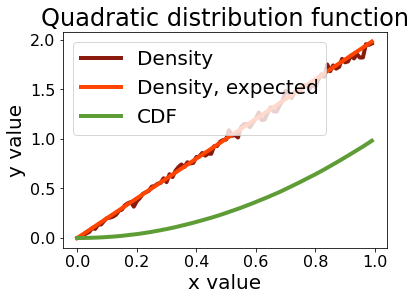

In [13]:
def map_f(x):
    return 2.0 * x


x, y = [], []
for i in range(100):
    x.append(0.01*i)

for i in range(100000):
    y.append( math.sqrt(rnd.uniform(0.0, 1.0) ) ) 
    
Y = DATA(y)
dens_y, cum_y = Y.Calculate_Distribution(x)

z = list(map( map_f , np.array(x) ))

plt.title('Quadratic distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

## Exercise 1

* What is the PDF of the numbers sampled as $\eta = \xi^2$, where $\xi$ is sampled from a uniform distribution on $[0, 1]$ interval? Compute it analytically.
* Sample such numbers and compute the distribution of the sampled data as well as the expected one (analytical function). Do the two match each other?

Pn=sqrt(𝜉) so dPn=1/2*1/sqrt(x)

/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


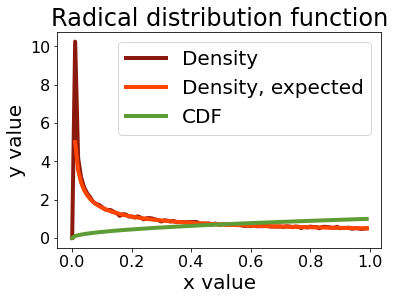

In [21]:
def map_f2(x):
    return 0.5 * 1/(x**0.5)


x, y = [], []
for i in range(100):
    x.append(0.01*i)

for i in range(100000):
    y.append( (rnd.uniform(0.0, 1.0)**2 ) ) 
    
Y = DATA(y)
dens_y, cum_y = Y.Calculate_Distribution(x)

z = list(map( map_f2 , np.array(x) ))

plt.title('Radical distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, z, label='Density, expected', linewidth=4, color = colors["12"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

## Exercise 2

* Sample random numbers on $(-\infty, +\infty)$ with the PDF $P(x) ~ \frac{1}{1+x^2}$

## 3. Quasi-random numbers. Dynamical regimes of chaotic systems.
<a name="quasi-random"></a>[Back to TOC](#TOC)

At this point, I want to remind you that the "random" numbers that are generated by the computer, aren't really random - they are just the deterministic sequences of numbers (that is derived according to some rules), that have desired statistical properties. Indeed, one can explore the `normal` function implementation in Libra to find out how to produce such numbers that would be normally-distributed. 

Here, we'll explore this quite interesting topic of building sequences of quasi-random numbers. 

Specifically, we'll consider the following mapping (and iterative process):

$$x_{n+1} = 4 r x_n (1 - x_n )$$  with $x_0 \in [0, 1]$

The parameter $r$ would be critical one that determines the dynamical regime of the mapping.

We define a function to produce arbitrarily long sequences build with this type of mapping

In [9]:
def mapping(r, x0, N):
    res, t = [], []
    x = x0
    for i in range(N):
        res.append(x)
        t.append(i)
        x = 4.0*r*x*(1.0 - x)

    return t, res

Let's create an auxiliary function to do a statistical analysis of the generated sequences, and to plot the sequences and the corresponding PDFs

In [10]:
def analyze_and_visualize(t, y):
    
    # Grid for the PDF
    x = []
    for i in range(0,100):
        x.append(i*0.01)
        
    # Compute the PDF
    dy = DATA(y)
    dens, cum = dy.Calculate_Distribution(x)
    
    # Plot all the stuff
    plt.figure(1, figsize=(18, 9))
    plt.subplot(1,2, 1)
    plt.title(F'Mapping')
    plt.xlabel('Time/Iteration number')
    plt.ylabel('x_n')
    plt.plot(t, y, "ro", label='$x_{n}$', linewidth=4, color = colors["11"]) 
    plt.legend()

    plt.subplot(1,2, 2)
    plt.title(F'PDF of the sequence')
    plt.xlabel('x value')
    plt.ylabel('PDF')
    plt.plot(x, dens, label='Density', linewidth=4, color = colors["11"]) 
    plt.legend()

    plt.show()
    plt.close()

Now, let's explore the behavior of this mapping as the function of $r \in [0, 1]$ and $x_0 \in [0, 1]$ parameters 

### **Case 1.** 

For small $r$ values, it doesn't really matter where we start, the sequence just collapses to $x_n = 0$

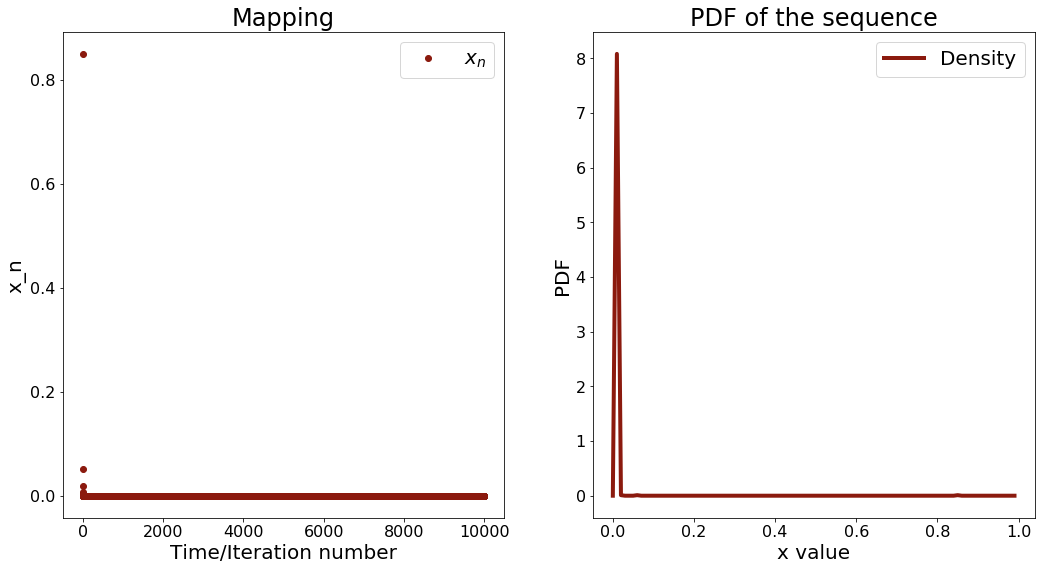

In [11]:
t, x = mapping(r=0.1, x0=0.85, N=10000)
analyze_and_visualize(t, x)

### **Case 2.** 

For bigger $r$ values, we get the sequence converge to $x_n = r$

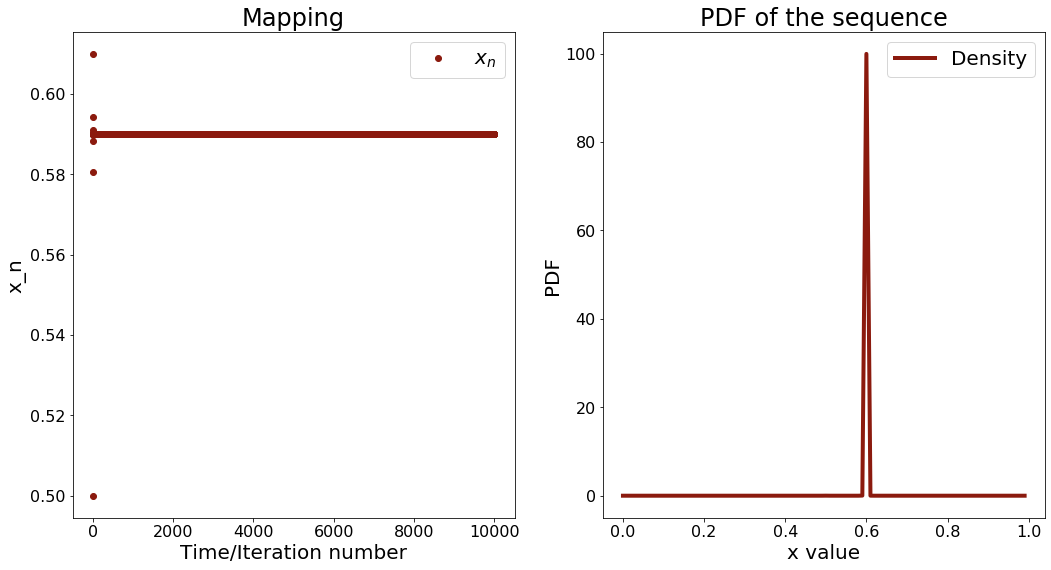

In [12]:
t, x = mapping(r=0.61, x0=0.5, N=10000)
analyze_and_visualize(t, x)

### **Case 3.** 

For even larger $r$ values, we start getting the bifurcations - the oscillations between 2 values

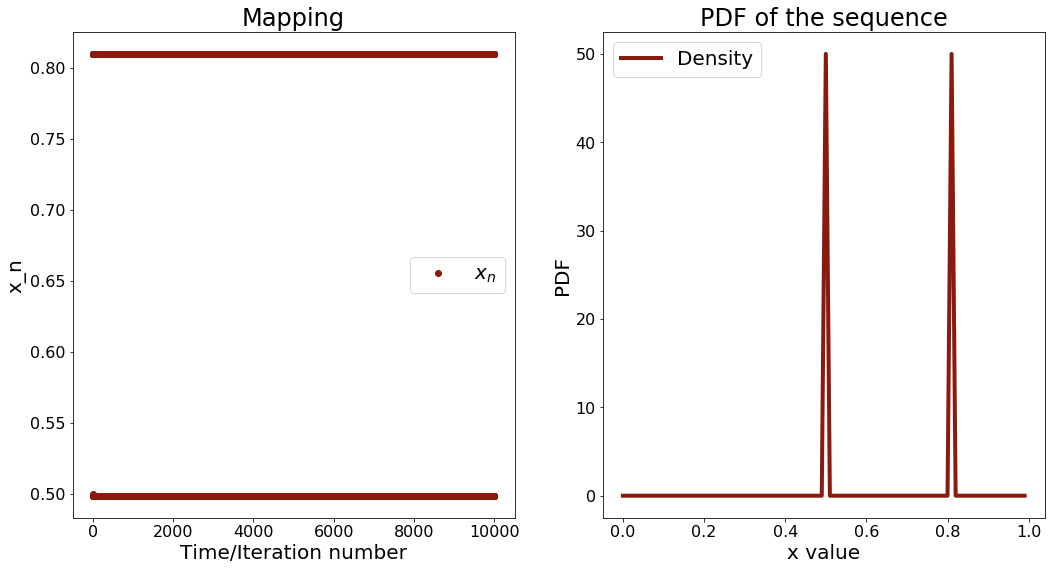

In [13]:
t, x = mapping(r=0.81, x0=0.5, N=10000)
analyze_and_visualize(t, x)

### **Case 4.** 

Then another bifurcations - the pair of the attractors splint, and now we have an oscillation between four values

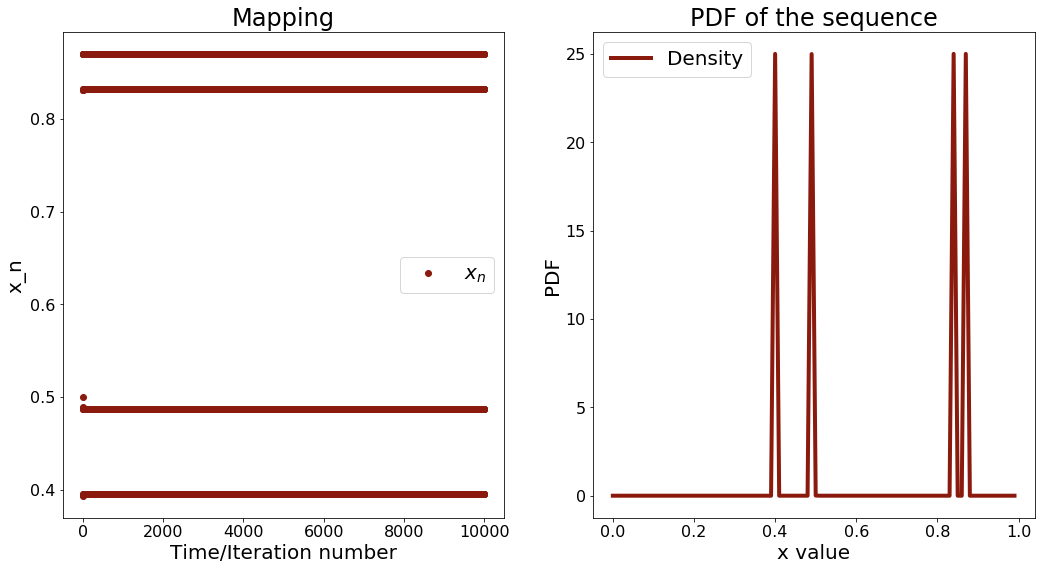

In [14]:
t, x = mapping(r=0.87, x0=0.5, N=10000)
analyze_and_visualize(t, x)

### **Case 5.** 

Then yet another one - so we have 8 values, but two of them are nearly degenerate, so we get only 7 peaks in PDF, but the last one has the doubled intensity

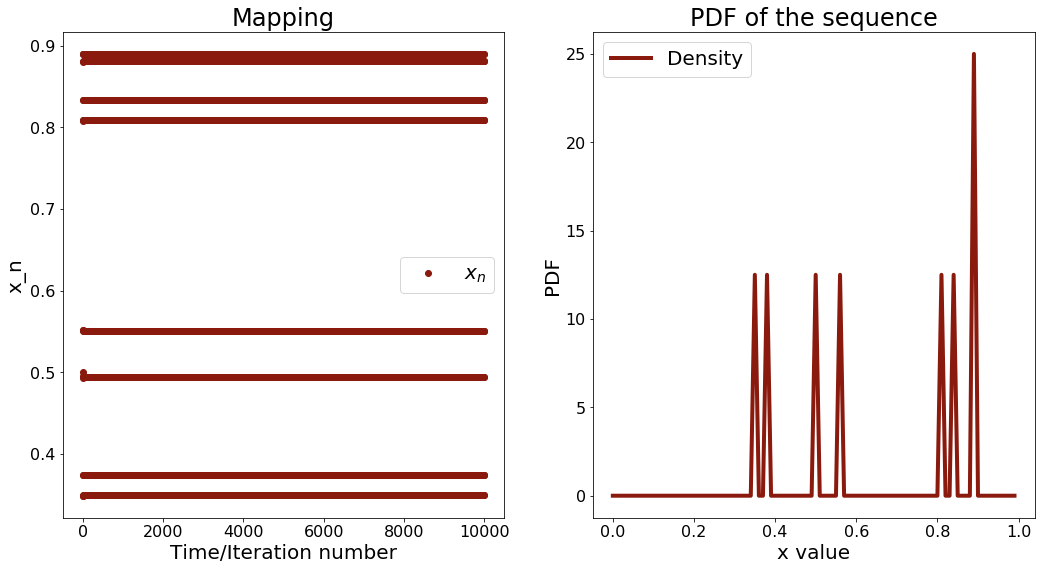

In [15]:
t, x = mapping(r=0.89, x0=0.5, N=10000)
analyze_and_visualize(t, x)

### Case 6

Finally, after a certain threshold value, the regular behavior of the mapping breaks down and we transition into a chaotic regime.

In this regime, the sampled numbers behave as quasi-random ones, sampled from some complex distribution. 

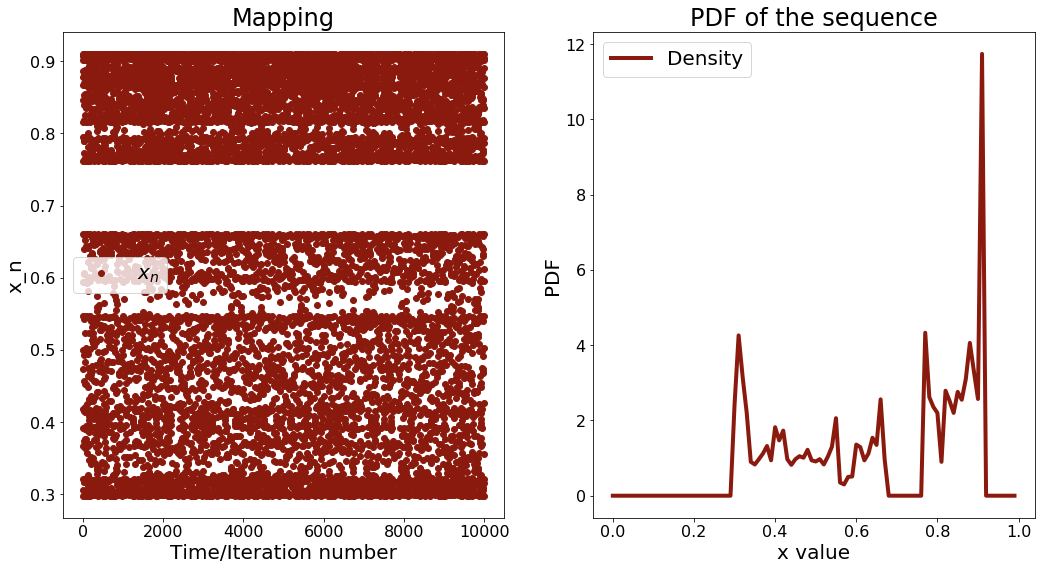

In [16]:
t, x = mapping(r=0.91, x0=0.5, N=10000)
analyze_and_visualize(t, x)

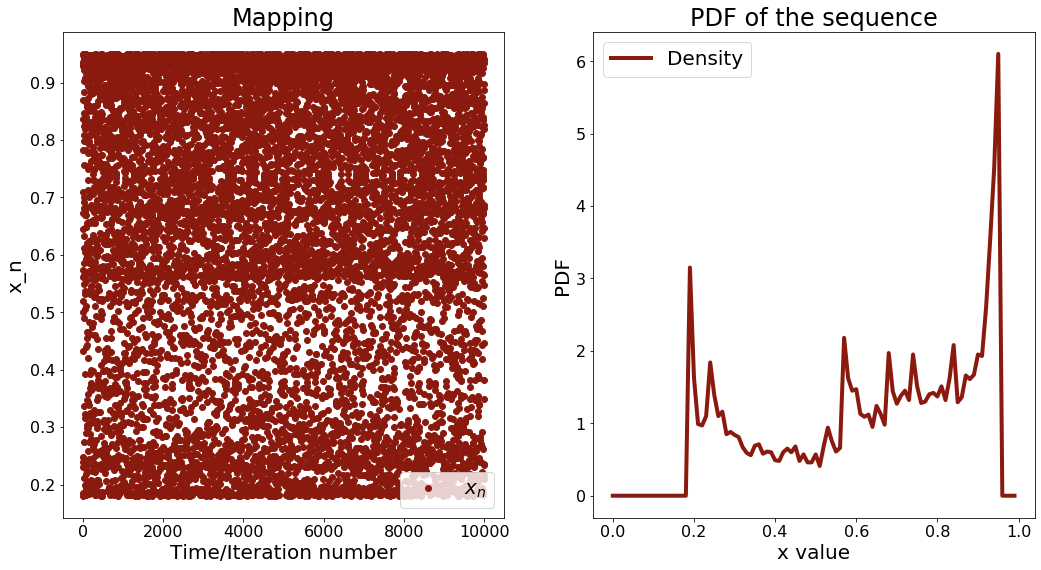

In [17]:
t, x = mapping(r=0.95, x0=0.5, N=10000)
analyze_and_visualize(t, x)

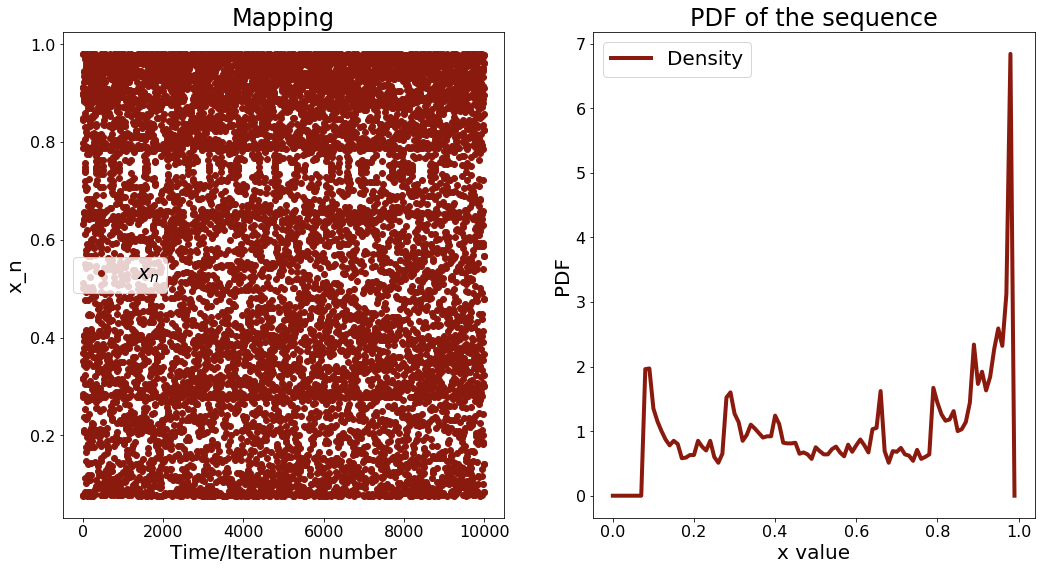

In [18]:
t, x = mapping(r=0.98, x0=0.9, N=10000)
analyze_and_visualize(t, x)

### Exercise 3

* Construct a 2D map showing that phase diagram of the above mapping. The two axes/coordinates would be the $r$ and $x_0$ parameters, and the map would be distinguishing the regions of different types of dynamical behavior. 